In [7]:
!pip install numpy matplotlib scipy -i https://mirror.baidu.com/pypi/simple --trusted-host mirror.baidu.com

Looking in indexes: https://mirror.baidu.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 2.0 MB/s eta 0:00:0000:0100:01


In [3]:
%conda env list

# conda environments:
#
base                     /root/anaconda3
dify                     /root/anaconda3/envs/dify
ecg                   *  /root/anaconda3/envs/ecg
huggingface              /root/anaconda3/envs/huggingface
xinference               /root/anaconda3/envs/xinference


Note: you may need to restart the kernel to use updated packages.


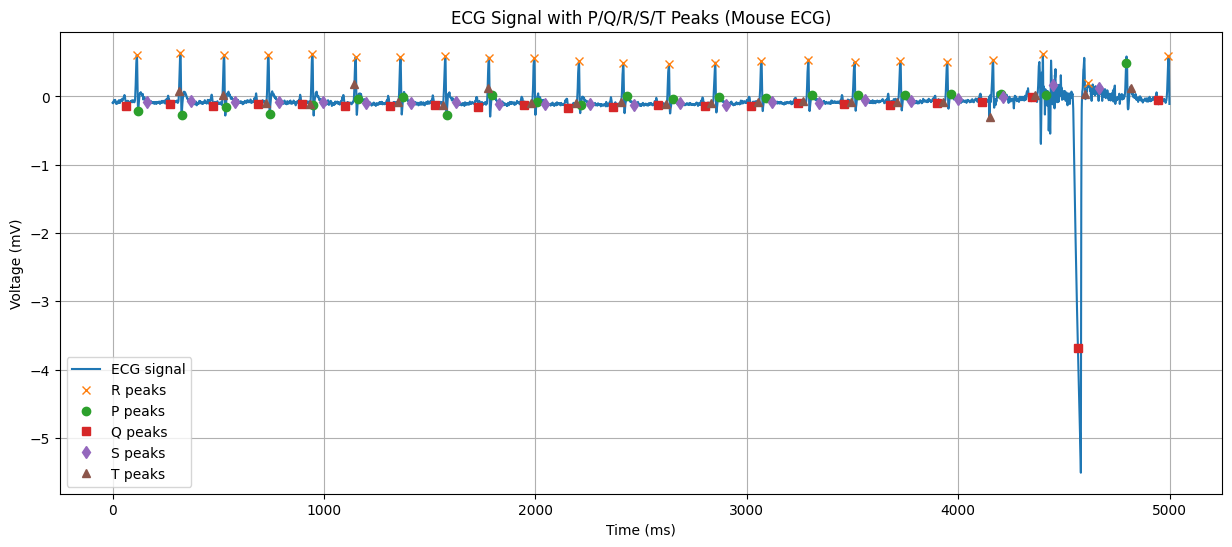

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 读取文件并跳过前1024字节
file_path = '/root/usercase1.lry'

with open(file_path, 'rb') as file:
    file.seek(1024)
    data = file.read()

# case 1 + 2
# 将二进制数据转换为电压值
# 每2字节代表一个电压值，使用二进制补码表示法，单位是(1/200)mV
num_samples = len(data) // 2
voltages = np.frombuffer(data, dtype=np.int16)[:num_samples] * (1 / 200)

# 取得前10秒的数据，每秒1000个数据点
sampling_rate = 1000  # 每毫秒一个数据点
duration = 5  # 前10秒
num_points = sampling_rate * duration
voltages = voltages[:num_points]

# 寻找R波峰（QRS波群的主要标志）
peaks, _ = find_peaks(voltages, distance=200)  # 设置距离以避免检测到相邻的R波峰

# case 3
# # 取得前3秒的数据，每秒1000个数据点
# sampling_rate = 1000  # 每毫秒一个数据点
# duration = 9  # 前3秒
# num_points = sampling_rate * duration
# voltages = voltages[:num_points]

# # 寻找R波峰（QRS波群的主要标志）
# r_peaks, _ = find_peaks(voltages, distance=200) 

# caes 1
# 标记P/Q/R/S/T波峰（这里只标记R波峰，P/Q/S/T波峰需要进一步处理）
r_peaks = peaks

# # 绘制心电图并标记波峰
# plt.figure(figsize=(15, 6))
# plt.plot(voltages, label='ECG signal')
# plt.plot(r_peaks, voltages[r_peaks], "x", label='R peaks')
# plt.title('ECG Signal with R Peaks')
# plt.xlabel('Time (ms)')
# plt.ylabel('Voltage (mV)')
# plt.legend()
# plt.grid()
# plt.savefig('/root/ecg_signal9.png')
# plt.show()

# case 2
# 假设P/Q/S/T波的位置
p_peaks = r_peaks - 200
q_peaks = r_peaks - 50
s_peaks = r_peaks + 50
t_peaks = r_peaks + 200

# 过滤掉超出范围的波峰
p_peaks = p_peaks[p_peaks > 0]
q_peaks = q_peaks[q_peaks > 0]
s_peaks = s_peaks[s_peaks < len(voltages)]
t_peaks = t_peaks[t_peaks < len(voltages)]

# 绘制心电图并标记波峰
plt.figure(figsize=(15, 6))
plt.plot(voltages, label='ECG signal')
plt.plot(r_peaks, voltages[r_peaks], "x", label='R peaks')
plt.plot(p_peaks, voltages[p_peaks], "o", label='P peaks')
plt.plot(q_peaks, voltages[q_peaks], "s", label='Q peaks')
plt.plot(s_peaks, voltages[s_peaks], "d", label='S peaks')
plt.plot(t_peaks, voltages[t_peaks], "^", label='T peaks')
plt.title('ECG Signal with P/Q/R/S/T Peaks (Mouse ECG)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.grid()
plt.savefig('/root/ecg_signal9.png')
plt.show()

# case 3
# # 假设P/Q/S/T波的位置
# p_peaks = r_peaks - 200
# q_peaks = r_peaks - 50
# s_peaks = r_peaks + 50
# t_peaks = r_peaks + 200

# # 过滤掉超出范围的波峰
# p_peaks = p_peaks[(p_peaks > 0) & (p_peaks < len(voltages))]
# q_peaks = q_peaks[(q_peaks > 0) & (q_peaks < len(voltages))]
# s_peaks = s_peaks[(s_peaks > 0) & (s_peaks < len(voltages))]
# t_peaks = t_peaks[(t_peaks > 0) & (t_peaks < len(voltages))]

# # 绘制心电图并标记波峰
# plt.figure(figsize=(15, 6))
# plt.plot(voltages, label='ECG signal')
# plt.plot(r_peaks, voltages[r_peaks], "x", label='R peaks')
# plt.plot(p_peaks, voltages[p_peaks], "o", label='P peaks')
# plt.plot(q_peaks, voltages[q_peaks], "s", label='Q peaks')
# plt.plot(s_peaks, voltages[s_peaks], "d", label='S peaks')
# plt.plot(t_peaks, voltages[t_peaks], "^", label='T peaks')
# plt.title('ECG Signal with P/Q/R/S/T Peaks (Mouse ECG)')
# plt.xlabel('Time (ms)')
# plt.ylabel('Voltage (mV)')
# plt.legend()
# plt.grid()
# plt.savefig('/root/ecg_signal6.png')
# plt.show()